<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab07_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio metodos computacionales, 
# Interpolacion





# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.











Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [131]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import newton
from scipy.interpolate import lagrange

In [132]:
vo = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = vo/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

def pos_x(t, vo, theta0, u, alpha, b, g  ):
  t1 = u*np.cos(alpha)*t  
  t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
  t3 = (1-np.exp(-b*t))
  return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
  t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
  t2 = (1-np.exp(-b*t)) 
  t3 = (g/b - u*np.sin(alpha))*t 
  return 1./b * t1 * t2 - t3

In [133]:
t = np.linspace(0, 8.5, 100)
Params = (vo, theta, u, alpha, b , g)  #Parametros en tupla.
x = pos_x(t, *Params)
y = pos_y(t, *Params)

In [134]:
dicc = {"x":x,"y":y ,"t":t}
df = pd.DataFrame(dicc)
df

,x,y,t
0,0.000000,0.000000,0.000000
1,3.629343,3.598794,0.085859
2,7.232105,7.110084,0.171717
3,10.808399,10.534245,0.257576
4,14.358340,13.871649,0.343434
...,...,...,...
95,240.425132,-1.673783,8.156566
96,241.976343,-4.916158,8.242424
97,243.509876,-8.216732,8.328283
98,245.025806,-11.575255,8.414141


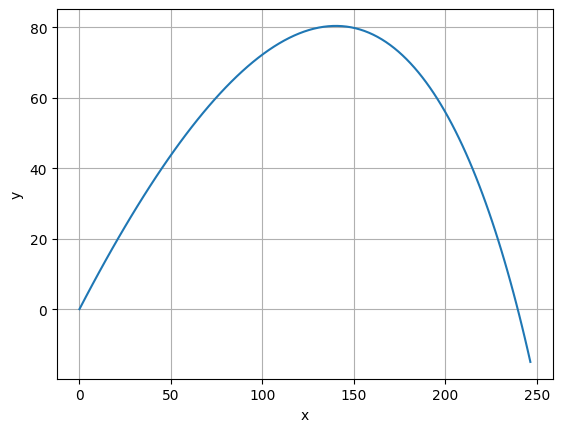

In [135]:
plt.plot(df.x, df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

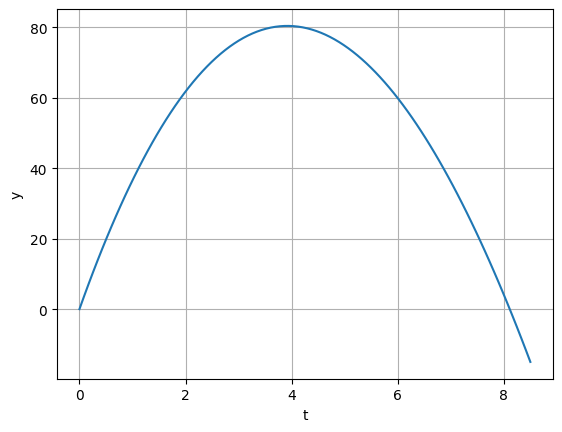

In [136]:
plt.plot(df.t, df.y)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()

In [137]:
tv = newton(pos_y, 6.5, args=Params)
tv

8.111627022095584

In [138]:
pos_x(tv, *Params)

239.60614945520726

# Generalizacion

In [139]:
np.arange(5, 85, 5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [140]:
theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento
theta

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694])

In [141]:
Rmax = np.zeros(len(theta))
for i, te in enumerate(theta):
  Params = (vo, te, u, alpha, b , g)  #Parametros en tupla.
  tv = newton(pos_y, 6.5, args = Params)
  Rmax[i] = pos_x(tv, *Params)
  print(tv,pos_x(tv, *Params))



1.0578875605920044 60.763777484752914
2.089913034510336 114.09205021224159
3.089692744426411 159.11424792149978
4.051318677578277 195.25160684420686
4.969342542565978 222.19257169674844
5.838759136595455 239.8660103813149
6.6549901113580745 248.4138542584094
7.413868867799826 248.16428008170354
8.111627022095584 239.60614945520726
8.744882661600728 223.36511298084008
9.310630442745067 200.18155773069185
9.806233464424599 170.8904144333061
10.229416772337517 136.40273086646266
10.57826230449348 97.68884772240796
10.85120506930887 55.76297184803644


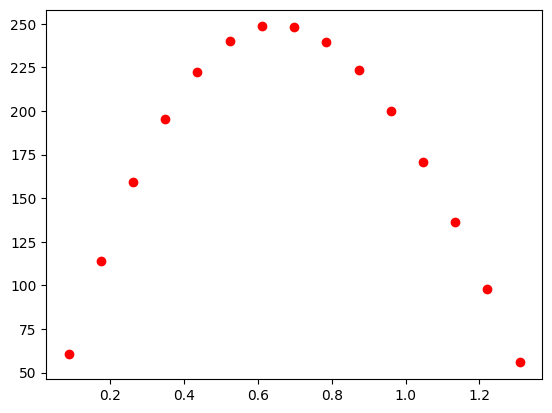

In [142]:
# Alcance maximo como funcion de theta
plt.plot(theta, Rmax,"ro" )

In [143]:
#Interpolacion de R en funcion de theta

In [144]:
import scipy as sp
from scipy import interpolate 
from scipy.interpolate import interp1d

In [145]:
from scipy.interpolate import lagrange

f_ = lagrange(theta,Rmax)
print(f_)

          14           13          12          11         10         9
0.002747 x  - 0.03536 x  + 0.2116 x  - 0.7555 x  + 1.629 x  - 1.311 x
          8         7         6         5         4         3         2
 - 4.521 x + 19.81 x - 33.31 x - 14.62 x + 234.8 x - 336.8 x - 412.3 x + 734.7 x - 3.759e-08


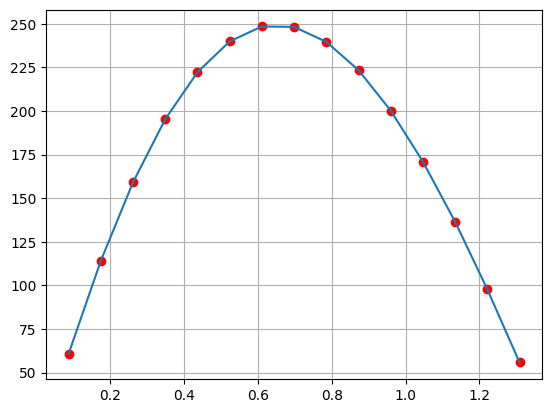

In [146]:
plt.figure()
plt.plot(theta,Rmax, 'ro')
plt.plot(theta,f_(theta))
plt.grid()

In [147]:
f = interpolate.interp1d(theta, Rmax, kind="cubic")

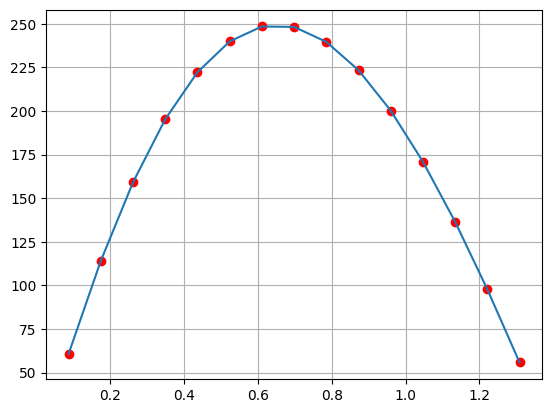

In [148]:
theta = np.deg2rad(np.arange(5, 80, 5)) 

plt.figure()
plt.plot(theta,Rmax, 'ro')
plt.plot(theta,f(theta))
plt.grid()




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


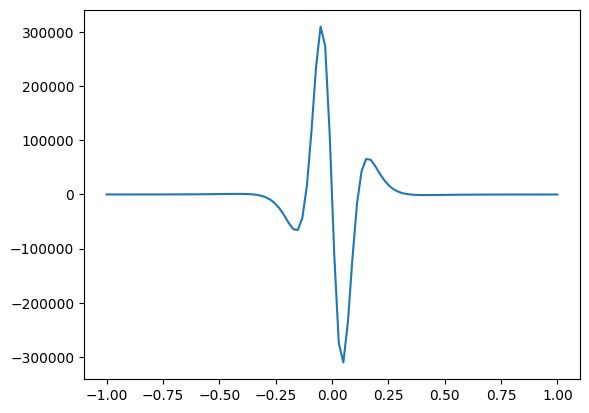

In [149]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

In [150]:
f1 = lagrange(x_,f_s(x_))

#print(f1)


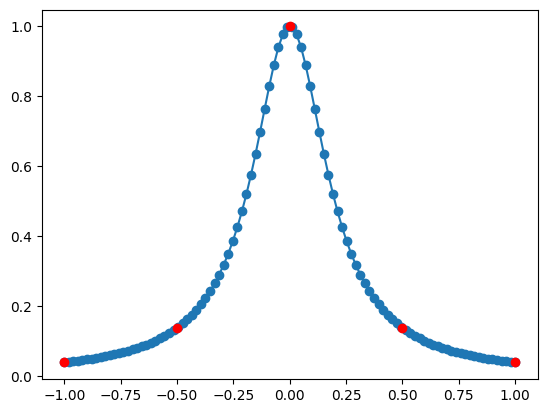

In [151]:
#Grafica de la funcion

plt.figure()

#puntos a interpolar

x1_ = np.linspace(-1,1,5)
x1_

#GRafica

plt.plot(x_,f_s(x_),"o-")
plt.plot(x1_,f_s(x1_),"ro")  #puntos que quiero interpolar

In [152]:
f2 = lagrange(x1_,f_s(x1_))  #interplacion de los cuatro puntos

print(f2)

       4             3         2
3.316 x + 1.041e-17 x - 4.277 x + 5.204e-18 x + 1


In [153]:
x1_ = np.linspace(-1,1,5)

x2_ = np.linspace(np.min(x1_),np.max(x1_))

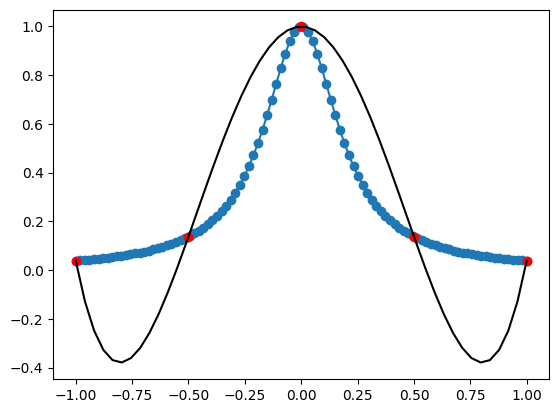

In [154]:
#Grafica de la funcion

plt.figure()

#puntos a interpolar


x1_ = np.linspace(-1,1,5)

x2_ = np.linspace(np.min(x1_),np.max(x1_))

#GRafica

plt.plot(x_,f_s(x_),"o-")
plt.plot(x1_,f_s(x1_),"ro")  #puntos que quiero interpolar
plt.plot(x2_, f2(x2_),"k-")

In [155]:
#Grafic mejorada

def interpolacion(N):


  n = N+1

  xw = np.linspace(-1,1,N)

  inter = lagrange(xw,f_s(xw))

  xww = np.linspace(np.min(x1),np.max(x1))


  return xww, inter

In [155]:
#Grafica
NN = [4,8,12,16,20,22]

i = 0
fig, axs = plt.subplots(figsize = (12,8),nrows = 2,ncols = 3)

for n in NN:

  ax = axs.flatten()     #vector de lasgraficasque quiero

  ax[i].plot(x_,f_s(x_),"bo-")
  ax[i].plot(xw,f_s(xw),"ro") 

  N=n

  x2,f2 = interpolacion(N)

  ax[i].plot(x2, f2(x2),"k-")
  ax[i].set_xlabel("x")
  ax[i].set_ylabel("f(x)")

  i = i+1

fig.subplots_adjust(wspace = 0.5)
fig.subplots_adjust(hspace = 0.5)
fig.subplots_adjust(hspace=0.2)

La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [156]:
#Calcular el error

N = 4
x2, f2 = interpolacion(N)

f_s = lambda x: 1/(1+25*x**2)
x = sp.symbols("x") # x será una variable simbólica
f5 = sp.diff(f_s(x),x, 5)

print(sp.diff(f_s(x),x, 5))

fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


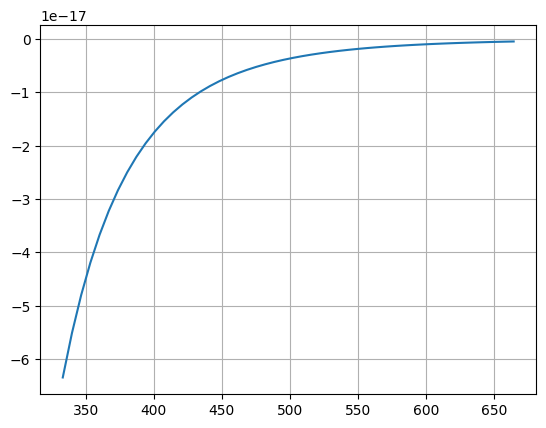

In [157]:
plt.plot(x2, fxn5(x2)) #grafica
plt.grid()

In [158]:
f2.coef
print(f2)

           3          2
1.735e-17 x - 0.2545 x - 6.072e-18 x + 0.293


In [159]:
import math

In [160]:
#Error

n = 4

#Puntos a interpolar

x1 = np.linspace(-1,1,5)

#Interpolacion

f2 = lagrange(x1,f_s(x1))
#print(f2)
#print(f_s(x1))


f_s = lambda x: 1/(1+25*x**2)

x = sp.symbols("x") # x será una variable simbólica

f4 = sp.diff(f_s(x),x, 4)
fxn4 = sp.lambdify(x,f5,'numpy') #numpy funcion

#Primer termino del error

uno = abs(fxn4(x1[3]) / math.factorial((4+1)))
uno

6.206885086134681

In [161]:
#segundo termino del error

x = sp.symbols("x") # x será una variable simbólica

#print(x1[0],x1[1],x1[2],x1[3],x1[4])

p_e=np.poly1d(x1,r=True)  #Creamos un polinomio con los valores a interpolar
#print(p_e)

#Derivamos el polinomio y encontramos las raices

rai = p_e.deriv().roots
#print(rai)

#Escogemos la maxima

max = rai[1]
#print(max)

#Evaluamos esta raiz en el polinomio con los puntos x

dos = np.abs(p_e(max))
#print(dos)

#error lado izquierdo

#print(abs(f_s(x1[3]) - f2(x1[3]))) 

#Nos indica que el error debe ser menor que este numero

E_4 = uno * dos

print("El error de la interpolacion de lagrange con grado n = 4 es", E_4)

El error de la interpolacion de lagrange con grado n = 4 es 0.7043713254978201


In [162]:
#Ahora calculamos con n =8

#Error

n = 8

#Puntos a interpolar

x2 = np.linspace(-1,1,9)

#Interpolacion

f2 = lagrange(x2,f_s(x2))
#print(f2)
#print(f_s(x2))


f_s = lambda x: 1/(1+25*x**2)

x = sp.symbols("x") # x será una variable simbólica

f4 = sp.diff(f_s(x),x, 4)
fxn4 = sp.lambdify(x,f5,'numpy') #numpy funcion

#Primer termino del error

uno = abs(fxn4(x2[3]) / math.factorial((4+1)))
uno

146.26710588855047

In [163]:
#segundo termino del error

x = sp.symbols("x") # x será una variable simbólica

#print(x2[0],x2[1],x2[2],x2[3],x2[4])

p_e=np.poly1d(x2,r=True)  #Creamos un polinomio con los valores a interpolar
#print(p_e)

#Derivamos el polinomio y encontramos las raices

rai = p_e.deriv().roots
#print(rai)

#Escogemos la maxima

max = rai[1]
#print(max)

#Evaluamos esta raiz en el polinomio con los puntos x

dos = np.abs(p_e(max))
#print(dos)

#error lado izquierdo

#print(abs(f_s(x2[3]) - f2(x2[3]))) 

#Nos indica que el error debe ser menor que este numero

E_4 = uno * dos

print("El error de la interpolacion de lagrange con grado n = 8 es", E_4)

El error de la interpolacion de lagrange con grado n = 8 es 2.7502985744763286


In [164]:
#Ahora calculamos con n = 12

#Error

n = 12

#Puntos a interpolar

x3 = np.linspace(-1,1,13)

#Interpolacion

f2 = lagrange(x3,f_s(x3))
#print(f2)
#print(f_s(x3))


f_s = lambda x: 1/(1+25*x**2)

x = sp.symbols("x") # x será una variable simbólica

f4 = sp.diff(f_s(x),x, 4)
fxn4 = sp.lambdify(x,f5,'numpy') #numpy funcion

#Primer termino del error

uno = abs(fxn4(x3[3]) / math.factorial((4+1)))
uno

6.206885086134681

In [165]:
#segundo termino del error

x = sp.symbols("x") # x será una variable simbólica

#print(x3[0],x3[1],x3[2],x3[3],x3[4])

p_e=np.poly1d(x3,r=True)  #Creamos un polinomio con los valores a interpolar
#print(p_e)

#Derivamos el polinomio y encontramos las raices

rai = p_e.deriv().roots
#print(rai)

#Escogemos la maxima

max = rai[1]
#print(max)

#Evaluamos esta raiz en el polinomio con los puntos x

dos = np.abs(p_e(max))
#print(dos)

#error lado izquierdo

#print(abs(f_s(x3[3]) - f2(x3[3]))) 

#Nos indica que el error debe ser menor que este numero

E_4 = uno * dos

print("El error de la interpolacion de lagrange con grado n = 12 es", E_4)

El error de la interpolacion de lagrange con grado n = 12 es 0.024877000032961324


In [166]:
n = 4
x1 = np.linspace(-1,1,5)

n = 8
x2 = np.linspace(-1,1,9)

n = 12
x3 = np.linspace(-1,1,13)

n = 16
x4 = np.linspace(-1,1,17)

n = 20
x5 = np.linspace(-1,1,21)

x_ = np.linspace(-1, 1, 100)

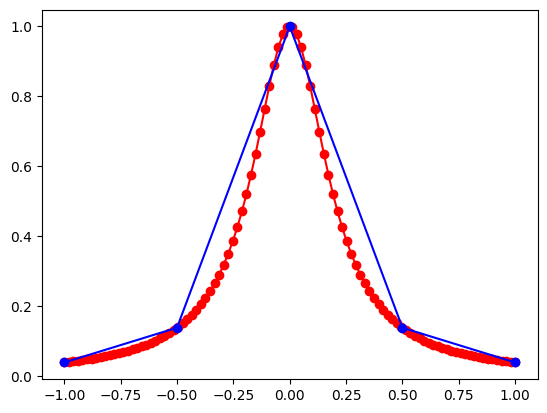

In [167]:
#Graficas de comparacion

plt.plot(x_,f_s(x_),'ro-')
plt.plot(x1,f2(x1), 'bo-')


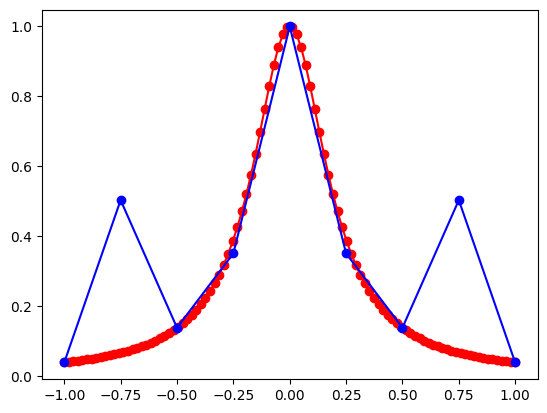

In [168]:
plt.plot(x_,f_s(x_),'ro-')
plt.plot(x2,f2(x2),'bo-')

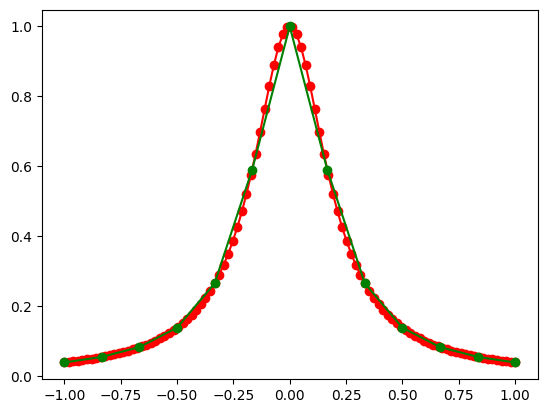

In [169]:
plt.plot(x_,f_s(x_),'ro-')
plt.plot(x3,f2(x3),'go-')

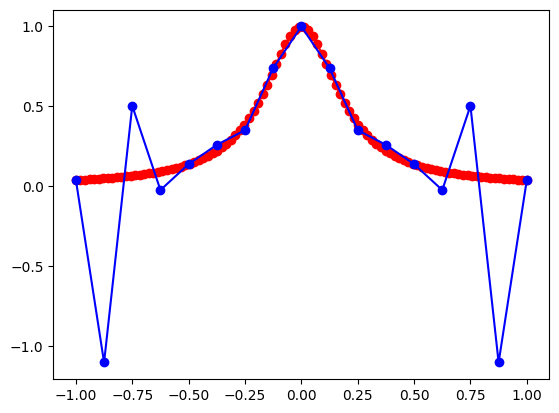

In [170]:
plt.plot(x_,f_s(x_),'ro-')
plt.plot(x4,f2(x4),'bo-')

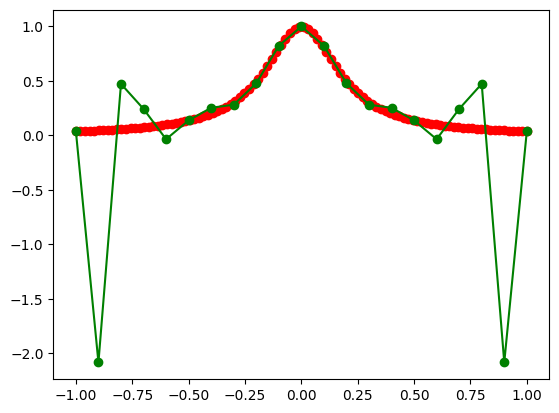

In [171]:
plt.plot(x_,f_s(x_),'ro-')
plt.plot(x5,f2(x5),'go-')

Text(0.5, 1.0, 'Interpolación con n = 20')

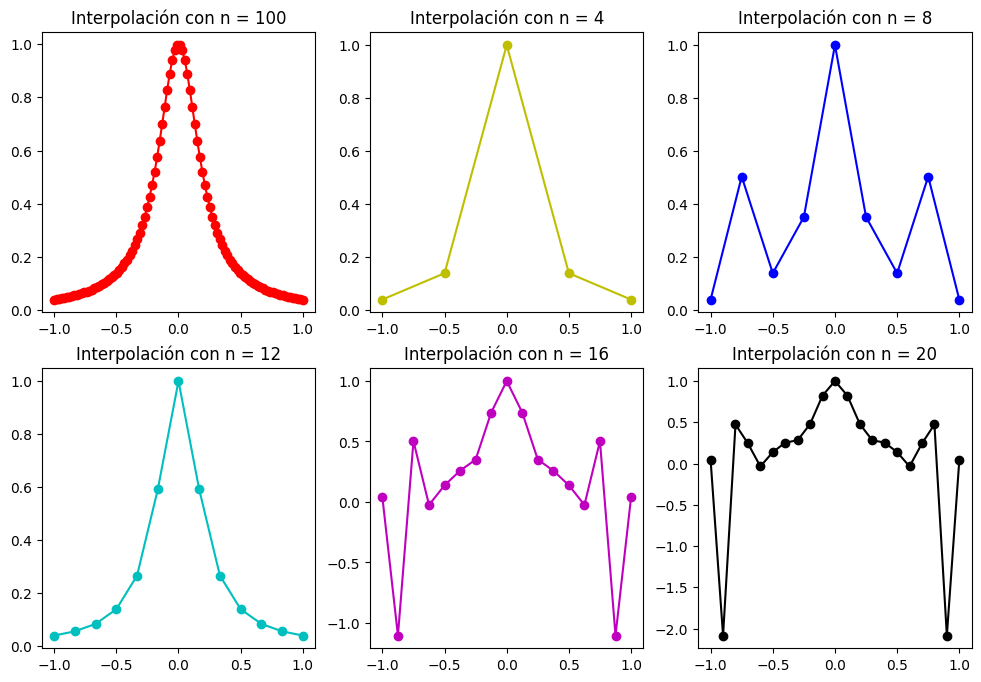

In [172]:
fig, axs = plt.subplots(figsize = (12,8),nrows = 2,ncols = 3)

ax = axs.flatten()     #vector de las graficas que quiero

ax[0].plot(x_,f_s(x_),"ro-")  
ax[1].plot(x1,f2(x1),"yo-") 
ax[2].plot(x2,f2(x2),"bo-")
ax[3].plot(x3,f2(x3),"co-") 
ax[4].plot(x4,f2(x4),"mo-")
ax[5].plot(x5,f2(x5),"ko-")

ax[0].set_title('Interpolación con n = 100')
ax[1].set_title('Interpolación con n = 4')
ax[2].set_title('Interpolación con n = 8')
ax[3].set_title('Interpolación con n = 12')
ax[4].set_title('Interpolación con n = 16')
ax[5].set_title('Interpolación con n = 20')


# 3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


In [173]:
from scipy import interpolate
import sympy
from scipy import special

In [174]:
n = 4
x1 = np.linspace(-1,1,5)

n = 8
x2 = np.linspace(-1,1,9)

n = 12
x3 = np.linspace(-1,1,13)

n = 16
x4 = np.linspace(-1,1,17)

n = 20
x5 = np.linspace(-1,1,21)

x_ = np.linspace(-1, 1, 100)

In [175]:
#Nuestra funcion es f_s
#Debemos calcular la derivada

In [176]:
f_s = lambda x: 1/(1+25*x**2)

x = sp.symbols("x") # x será una variable simbólica

f_sp = sp.diff(f_s(x),x)

fpp = sp.lambdify(x,f_sp,'numpy')

In [177]:
H1_ = interpolate.CubicHermiteSpline(x1,f_s(x1),fpp(x1))
H2_ = interpolate.CubicHermiteSpline(x2,f_s(x2),fpp(x2))
H3_ = interpolate.CubicHermiteSpline(x3,f_s(x3),fpp(x3))
H4_ = interpolate.CubicHermiteSpline(x4,f_s(x4),fpp(x4))
H5_ = interpolate.CubicHermiteSpline(x5,f_s(x5),fpp(x5))

Text(0.5, 1.0, 'Interpolación con n = 20')

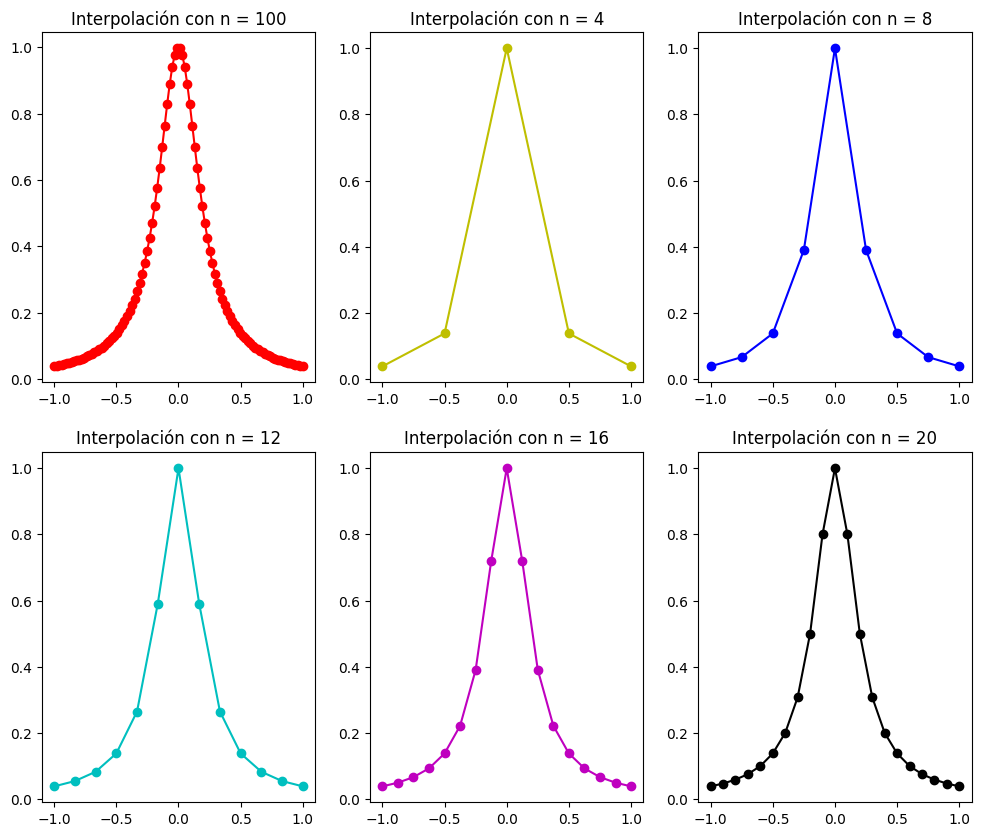

In [178]:
#Graficas

fig, axs = plt.subplots(figsize = (12,10),nrows = 2,ncols = 3)

ax = axs.flatten()     #vector de las graficas que quiero

ax[0].plot(x_,f_s(x_),"ro-")  
ax[1].plot(x1,H1_(x1),"yo-") 
ax[2].plot(x2,H2_(x2),"bo-")
ax[3].plot(x3,H3_(x3),"co-") 
ax[4].plot(x4,H4_(x4),"mo-")
ax[5].plot(x5,H5_(x5),"ko-")

ax[0].set_title('Interpolación con n = 100')
ax[1].set_title('Interpolación con n = 4')
ax[2].set_title('Interpolación con n = 8')
ax[3].set_title('Interpolación con n = 12')
ax[4].set_title('Interpolación con n = 16')
ax[5].set_title('Interpolación con n = 20')

In [179]:
H1 = special.hermite(9,monic = False)
H2 = special.hermite(17,monic = False)
H3 = special.hermite(23,monic = False)
H4 = special.hermite(33,monic = False)
H5 = special.hermite(41,monic = False)

#print(H3) 
#print(H1)  #Polinomio con n = 4

In [180]:
#Error

e = abs(f_s(x1[3])- H1(x1[3]))

print("El error debe ser menor a",e)

El error debe ser menor a 6480.862068965517


In [181]:
n = 4
x1 = np.linspace(-1,1,5)

n = 8
x2 = np.linspace(-1,1,9)

n = 12
x3 = np.linspace(-1,1,13)

n = 16
x4 = np.linspace(-1,1,17)

n = 20
x5 = np.linspace(-1,1,21)

x_ = np.linspace(-1, 1, 100)

In [182]:
#Primer termino del error

n = 4

f10 = sp.diff(f_s(x),x, 10)

fxn10 = sp.lambdify(x,f10,'numpy') #numpy funcion

#Evaluamos la derivada en el termino 4 de las x

fxn10(x1[3]) 

uno_ = fxn10(x1[3]) / math.factorial(10)
#print(uno_)


#Calculamos el segundo termino del error

re = np.poly1d(x1,r =True) #Creamos un polinomio con los terminos lineales

poli_2 = re**2  #Elevamos al cuarado debido a al formula del error de hermite

#print(poli_2)

#Derivamos el polinomio y encontramos las raices

rai = poli_2.deriv().roots
#print(rai)

#Escogemos la maxima

max = rai[1]
#print(max)

#Evaluamos esta raiz en el polinomio con los puntos x

dos_ = np.abs(p_e(max))
3#print(dos_)

#Calculamos el error total

E_t = abs(uno_*dos_)
print("El error de la interpolacion de Hermite con n =",n, "es",E_t)


El error de la interpolacion de Hermite con n = 4 es 0.027726137877812446


In [183]:
#Primer termino del error

n = 20

f10 = sp.diff(f_s(x),x, 10)

fxn10 = sp.lambdify(x,f10,'numpy') #numpy funcion

#Evaluamos la derivada en el termino 4 de las x

fxn10(x5[3]) 

uno_ = fxn10(x5[3]) / math.factorial(10)
#print(uno_)


#Calculamos el segundo termino del error

re = np.poly1d(x5,r =True) #Creamos un polinomio con los terminos lineales

poli_2 = re**2  #Elevamos al cuarado debido a al formula del error de hermite

#print(poli_2)

#Derivamos el polinomio y encontramos las raices

rai = poli_2.deriv().roots
#print(rai)

#Escogemos la maxima

max = rai[1]
#print(max)

#Evaluamos esta raiz en el polinomio con los puntos x

dos_ = np.abs(p_e(max))
3#print(dos_)

#Calculamos el error total

E_t = abs(uno_*dos_)
print("El error de la interpolacion de Hermite con n =",n, "es",E_t)

El error de la interpolacion de Hermite con n = 20 es 0.0017674876368714255


In [218]:
#Graficas utilizando

#fig, axs = plt.subplots(figsize = (12,10),nrows = 2,ncols = 3)

#ax = axs.flatten()     #vector de las graficas que quiero

#ax[0].plot(x_,f_s(x_),"ro-")  
#ax[1].plot(x1,H1(x1),"yo-") 
#ax[2].plot(x2,H2(x2),"bo-")
#ax[3].plot(x3,H3(x3),"co-") 
#ax[4].plot(x4,H4(x4),"mo-")
#ax[5].plot(x5,H5(x5),"ko-")
#
#ax[0].set_title('Interpolación con n = 100')
#ax[1].set_title('Interpolación con n = 4')
#ax[2].set_title('Interpolación con n = 8')
#ax[3].set_title('Interpolación con n = 12')
#ax[4].set_title('Interpolación con n = 16')
#ax[5].set_title('Interpolación con n = 20')

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [185]:
#Solución

In [186]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [187]:
x = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
y = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 1.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

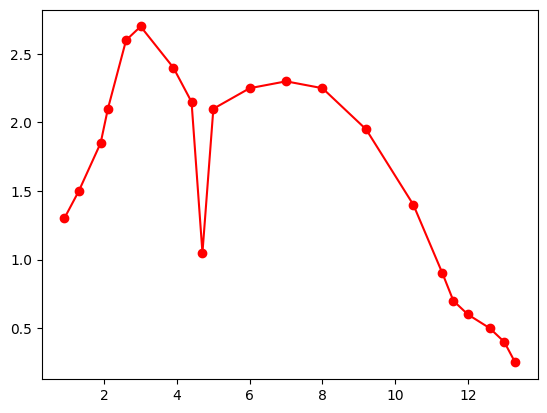

In [188]:
plt.plot(x,y,"ro-")

In [189]:
#Polinomio de lagrange interpolación

f_pa = lagrange(x,y)
print(f_pa)


            20             19             18             17
-8.875e-10 x  + 1.239e-07 x  - 8.051e-06 x  + 0.0003236 x 
             16          15         14         13         12        11
 - 0.009009 x  + 0.1845 x  - 2.879 x  + 35.01 x  - 336.6 x  + 2579 x 
              10             9             8             7
 - 1.581e+04 x  + 7.753e+04 x - 3.033e+05 x + 9.392e+05 x
              6             5             4             3             2
 - 2.276e+06 x + 4.242e+06 x - 5.925e+06 x + 5.965e+06 x - 4.062e+06 x + 1.664e+06 x - 3.074e+05


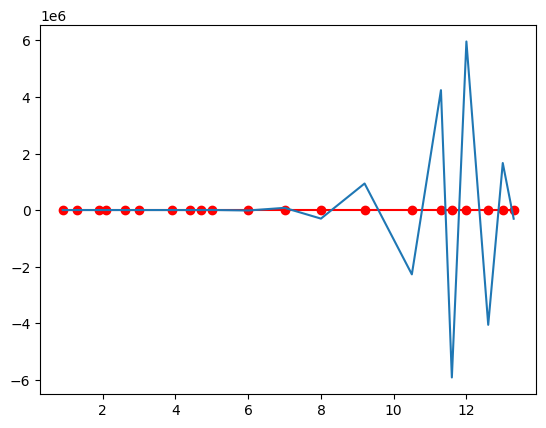

In [190]:
#Grafica

plt.plot(x,y,"ro-")
plt.plot(x,f_pa)

#Obervamos que lagramge no nos hace una buena interpolacion

In [191]:
#Interpolación lineal

f_pa1 = interpolate.interp1d(x, y, kind="cubic")

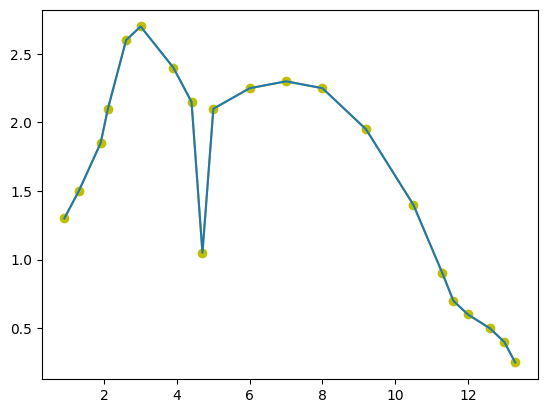

In [192]:
plt.figure()
plt.plot(x,y,"yo-")
plt.plot(x,f_pa1(x))

In [193]:
#Interpolacion por spline cubic

import numpy as np
from scipy.interpolate import CubicSpline

cs = CubicSpline(x, y)

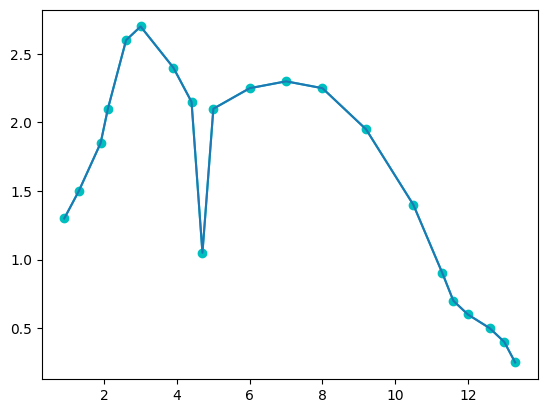

In [194]:
plt.figure()
plt.plot(x,y,"co-")
plt.plot(x,cs(x))

In [195]:
#Eliminamos un valor inusual que seria le valor numero 9 en posicion

In [196]:
x2 = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
y2 = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

In [197]:
cs1 = CubicSpline(x2, y2)

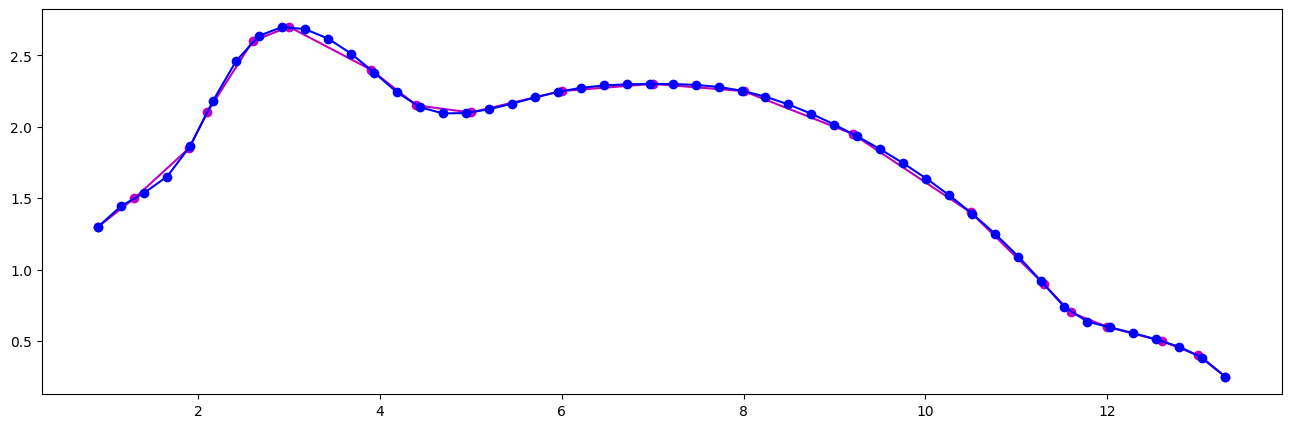

In [198]:
plt.figure(figsize = (16,5))
plt.plot(x2,y2,"mo-")
x9 = np.linspace(np.min(x2),np.max(x2))
plt.plot(x9,cs1(x9),'bo-')

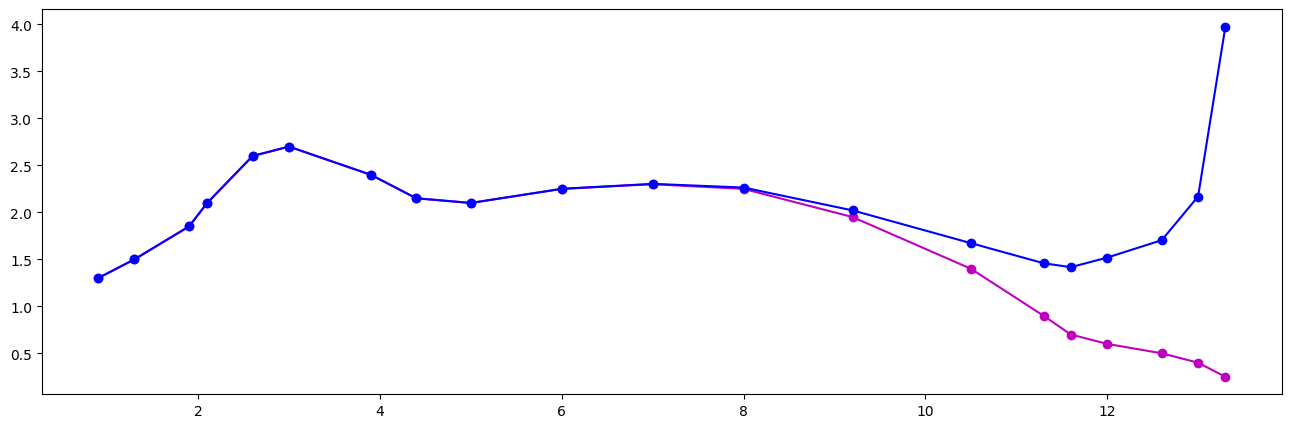

In [199]:
#lagrange

plt.figure(figsize = (16,5))
plt.plot(x2,y2,"mo-")
#x9 = np.linspace(np.min(x2),np.max(x2))
plt.plot(x2,f_pa(x2),'bo-')

In [200]:
#Creando los puntos con los pixeles y sus coordenadas

In [201]:
x1 = [333,357,366,379.5,396,406.5,414,426,433.5,448.5,459,472.5,483,493.5,510,528,546,571.5,597,612,637.5,660,664.5,652.5,630,603,589.5,576,553.5,541.5,532.5,523.5,513,495,468,444.1,438,447,448.5,457.5,457.5,460,448.5,441,427.5,412.5,396,373.5,352.5,336]
y1 = [75,61.5,49.5,40.5,40.5,42,45,52.5,54,52.5,52.5,49.5,48,48,48,52.5,55.5,66,79.5,87,93,96,99,103.5,109.5,108,112.5,117,117,120,127.5,154.5,183,205.5,238.5,246,238.5,223.5,195,175.5,148,112.5,103.5,93,82.5,79.5,73.5,73.5,82.5,75]

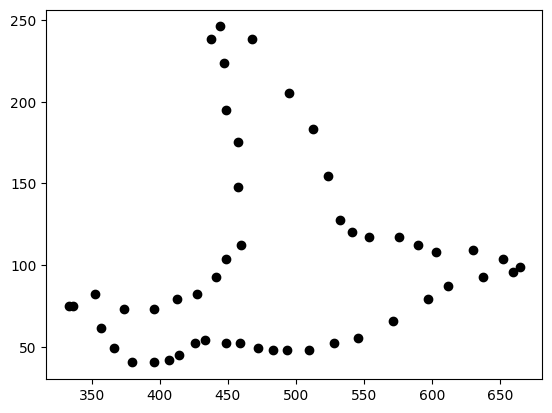

In [202]:
plt.plot(x1,y1,'ko')

# 5.0 Ejercicios de Repaso

 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


e. Para los 100 puntos anteriores, emplee el metodo de interpolación de lagrange y cubic-spline. Realizar una gráfica mostrando los puntos y el polinomio de interpolación para cada unos de los metodos. ¿Que puede concluir de los metodos?

In [203]:
#SOLUCIÓN

In [204]:
#Definimos la funcion

def m(T,x):
  x = sp.symbols("x")

  x1 = sp.exp(x/T) / sp.exp(-x/T) * sp.exp(x/T)
  x2 = sp.exp(-x/T) / sp.exp(-x/T) * sp.exp(x/T)

  y = x1 - x2 - x

  return y

In [205]:
#Definimos la funcion

#x = sp.symbols("x")
#m = (sp.exp(x/0.5) / sp.exp(-x/0.5) * sp.exp(x/0.5)) - (sp.exp(-x/0.5) / sp.exp(-x/0.5) * sp.exp(x/0.5)) - x

In [206]:
print("Esta es nuestra funcion objetivo",m(0.5,x))

Esta es nuestra funcion objetivo -x - exp(2.0*x) + exp(6.0*x)


In [207]:
def f_m(x):

  return -x - np.exp(2*x) + np.exp(6*x)

In [208]:
#Pasamos la fucnion de sympy a numpy

#f_m = sp.lambdify(x,m,"numpy")
#print(f_m)

In [209]:
#Vamos a utilizar el metodo de la secante para encontrar sus raices

from scipy.optimize import root_scalar

r = root_scalar(f_m, method = 'secant', x0 = -1, x1 = 1)

#print(r)
root = -0.36885110546282895
print(round(root,4))

-0.3689


Text(-0.36885110546282895, 0, '-0.369')

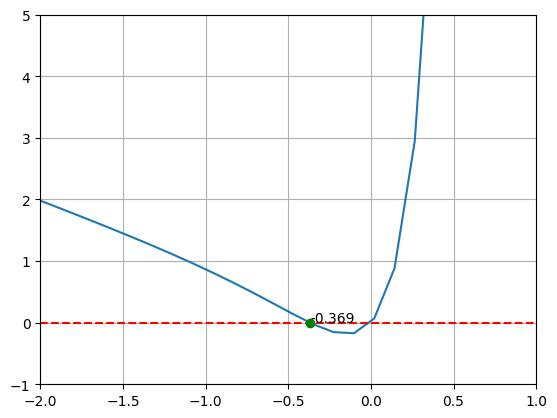

In [210]:
#Graficamos

xz = np.linspace(-5,1,50)
plt.plot(xz,f_m(xz))
plt.ylim(-1,5)
plt.xlim(-2,1)
plt.axhline(y=0, color='r', linestyle='--')
plt.grid()

plt.plot(root,0,"go")
plt.text(root,0,f"{root:.3}")

#Raiz con el metodo de la secante

In [211]:
#Vamos a utilizar el metodo del punto fijo para encontrar sus raices

from scipy.optimize import fixed_point

r1 = fixed_point(f_m, -0.1)

#print(r1)

root1 = -0.17857948137081128
print(round(root1,4))

-0.1786


Text(-0.17857948137081128, 0, '-0.179')

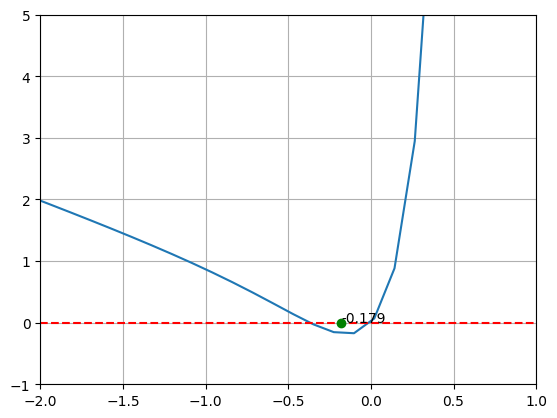

In [212]:
#Graficamos

xz = np.linspace(-5,1,50)
plt.plot(xz,f_m(xz))
plt.ylim(-1,5)
plt.xlim(-2,1)
plt.axhline(y=0, color='r', linestyle='--')
plt.grid()

plt.plot(root1,0,"go")
plt.text(root1,0,f"{root1:.3}")

#Raiz con el metodo de punto fijo

In [213]:
#Metodo de newton

from scipy.optimize import newton

r4 = newton(f_m, x0=-1)

#print(r4)
root2 = -0.3688511054628288
print(round(root2,4))

-0.3689


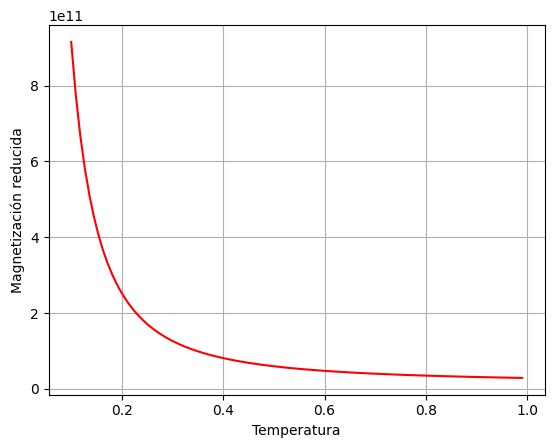

In [214]:
#Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir
# un gráfico de magnetización reducida como función de la temperatura para los 100 valores de T.7


# Definimos la función de la magnetización reducida
def m(x, T):
    return np.tanh(2*x*T)/(2*x*T)

# Creamos un arreglo de 100 valores entre 0.1 y 0.99
T = np.linspace(0.1,0.99,100)

# Calculamos la magnetización reducida para cada valor de T usando el método de la secante
mr = []
for t in T:
    r = root_scalar(m, args=(t,), method='secant', x0=0.1, x1=1.0)
    mr.append(r.root)

# Graficamos la magnetización reducida en función de la temperatura
plt.plot(T, mr,color='red')
plt.xlabel('Temperatura')
plt.ylabel('Magnetización reducida')
plt.grid()



In [215]:
#Interpolacion lagrange

from scipy.interpolate import lagrange

L = lagrange(T,mr)
#print(L)

In [216]:
#Interpolacion Cubic spline

from scipy.interpolate import CubicSpline

C = CubicSpline(T,mr)

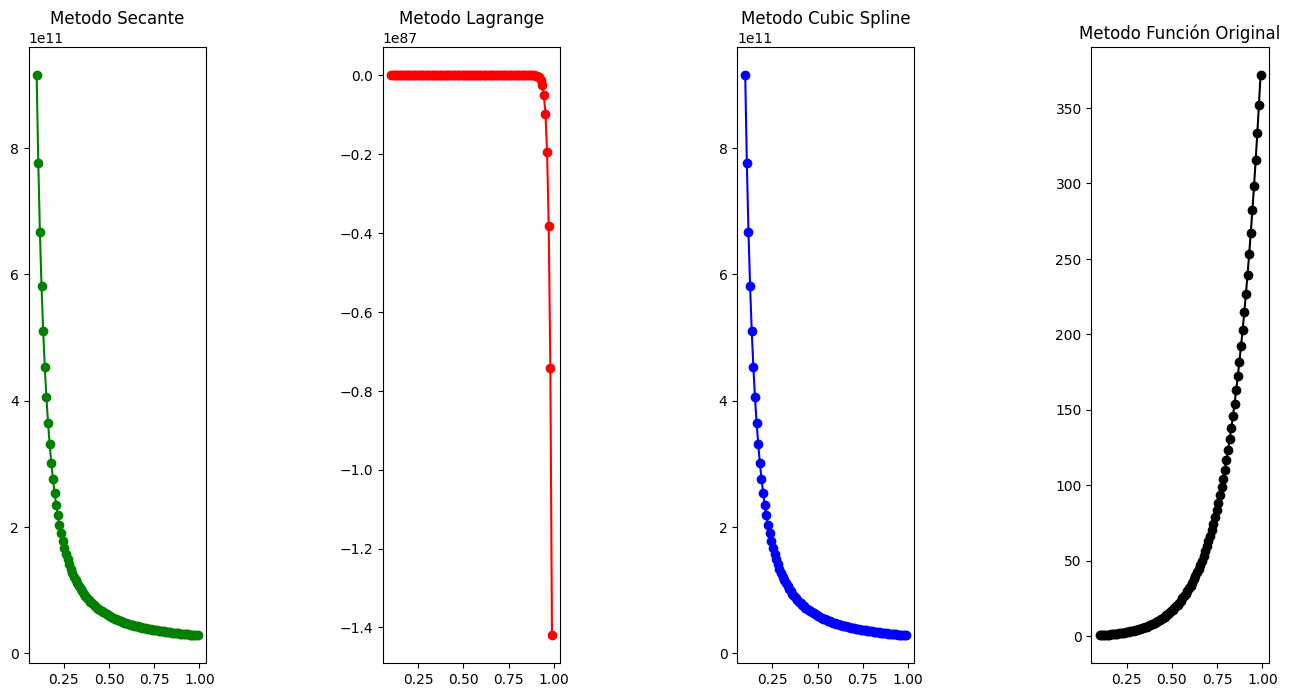

In [219]:
#Grafica

fig, axs = plt.subplots(figsize = (16,8),nrows = 1, ncols = 4)


ax = axs.flatten()

ax[1].plot(T,L(T),'ro-')
ax[2].plot(T,C(T),'bo-')
ax[0].plot(T,mr,'go-')
ax[3].plot(T,f_m(T),'ko-')

ax[0].set_title("Metodo Secante")
ax[1].set_title("Metodo Lagrange")
ax[2].set_title("Metodo Cubic Spline")
ax[3].set_title("Metodo Función Original")

plt.subplots_adjust(hspace=1.5)

plt.subplots_adjust(wspace=1.0)